In [1]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
from os import listdir,makedirs
from os.path import isfile,join
import cv2

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout,  Conv2D, Input, Lambda, Flatten, TimeDistributed
from tensorflow.keras.layers import Add, Reshape, MaxPooling2D, Concatenate, Embedding, RepeatVector, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers.core import Dense, Dropout, Activation
import np_utils
from keras.src.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Activation,Layer
#from keras.engine.topology import Layer
from tensorflow.keras.callbacks import TensorBoard
from keras.layers import LeakyReLU
import os
import shutil

2024-04-16 20:13:36.371816: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-16 20:13:36.374599: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 20:13:36.414554: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 20:13:36.414609: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 20:13:36.415568: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:

#gt=os.path.join('/content/drive/MyDrive/Anomaly/BTech_Dataset_transformed/02/ground_truth')
#train_path='/content/drive/MyDrive/Anomaly/BTech_Dataset_transformed/02/train/ok'
#test_path='/content/drive/MyDrive/Anomaly/BTech_Dataset_transformed/02/test/ko'

# gt=os.path.join('/home/ai/Pritha/mvt/toothbrush/ground_truth/hole')
# train_path='/home/ai/Pritha/mvt/toothbrush/train/good'
# test_path='/home/ai/Pritha/mvt/toothbrush/test/defective'

# gt=os.path.join('/home/ai/Pritha/mvt/screw/ground_truth/scratch_neck')
# train_path='/home/ai/Pritha/mvt/screw/train/good'
# test_path='/home/ai/Pritha/mvt/screw/test/scratch_neck'

train_path='/home/ai/Pritha/autoencoder_with_3_layers/GRID1/test/0_good/good'
test_path='/home/ai/Pritha/autoencoder_with_3_layers/GRID1/test/1_defective/defective'

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

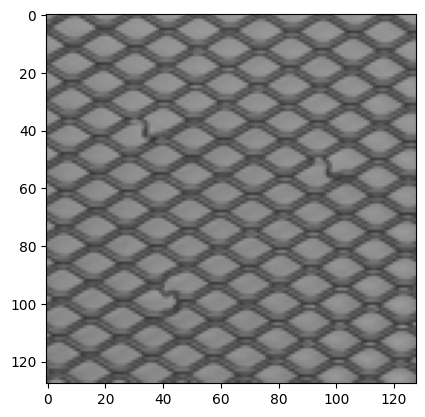

In [3]:
SIZE=128
batch_size = 20
from os.path import join

sz=len(os.listdir(train_path))
sz1=len(os.listdir(test_path))
y_train=np.zeros(sz)
train=np.zeros(shape=(sz,SIZE,SIZE,3))
merge=np.zeros(shape=((sz+sz1),SIZE,SIZE,3))
cnt=0
k=0
for r in os.listdir(train_path):
  img=Image.open(join(train_path,r)).resize((SIZE,SIZE))
  img=np.array(img,dtype=np.float32)/float(256)
  print(img.shape)  
  train[cnt,:,:,:]=img
  merge[k,:,:,:]=img
  y_train[cnt]=0
  cnt=cnt+1
  k=k+1
print('y_train')
print(y_train.shape)

test=np.zeros(shape=(sz1,SIZE,SIZE,3))
y_test=np.zeros(sz1)
cnt=0
for r in os.listdir(test_path):
  img=Image.open(join(test_path,r)).resize((SIZE,SIZE))
  img=np.array(img,dtype=np.float32)/float(256)
  test[cnt,:,:,:]=img
  merge[k,:,:,:]=img
  y_test[cnt]=1
  cnt=cnt+1
  k=k+1

X_train=train
X_test=test
#X_train = X_train.astype('float32') / 255.
#X_test = X_test.astype('float32') / 255.
#X_train = np.reshape(X_train, (len(X_train), SIZE, SIZE,3))
#X_test = np.reshape(X_test, (len(X_test), SIZE, SIZE, 3))

X_test.shape


plt.imshow(X_test[2])

In [73]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

validation_generator =datagen.flow(X_train, y_train, batch_size=batch_size)


anomaly_generator = datagen.flow(X_test, y_test , batch_size=batch_size)

print(train_generator)

In [4]:
path = 'Grid_o/test2/2_defective/defective' # Source Folder
dstpath = 'GRID1/test/1_defective/defective' # Destination Folder
try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in same folder")

files = list(filter(lambda f: isfile(join(path,f)), listdir(path)))
for image in files:
    # img = cv2.imread(os.path.join(path,image))
    # gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # gray_three = cv2.merge([gray,gray,gray])
    # dstPath = join(dstpath,image)
    # cv2.imwrite(dstPath,gray_three)
    try:
        img = cv2.imread(os.path.join(path,image))
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        gray_three = cv2.merge([gray,gray,gray])
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath,gray_three)
    except:
        print ("{} is not converted".format(image))

path = '/home/ai/Pritha/mvt/grid/train/good' # Source Folder
dstpath = 'GRID1/test/0_good/good' # Destination Folder
try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in same folder")

files = list(filter(lambda f: isfile(join(path,f)), listdir(path)))
for image in files:
    try:
        img = cv2.imread(os.path.join(path,image))
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        gray_three = cv2.merge([gray,gray,gray])
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath,gray_three)
    except:
        print ("{} is not converted".format(image))

In [4]:
image_size = 128
batch_size = 10
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    'GRID1/test/0_good/',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='input'
    )

validation_generator = datagen.flow_from_directory(
    'GRID1/test/0_good/',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='input'
    )

anomaly_generator = datagen.flow_from_directory(
    'GRID1/test/1_defective/',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='input'
    )

test_generator = datagen.flow_from_directory(
    'GRID1/test',
    target_size=(image_size, image_size),
    batch_size=1,
    class_mode='binary'
    )

Found 264 images belonging to 1 classes.
Found 264 images belonging to 1 classes.
Found 57 images belonging to 1 classes.
Found 321 images belonging to 2 classes.


In [6]:
from tensorflow.python.ops.math_ops import xdivy
def SSIMLoss(y_true, y_pred):
    print(y_pred.shape)
    print(y_true.shape)
   # y_pred = tf.reshape(y_pred,[-1,128,128,1])
   # y_true = tf.reshape(y_true,[-1,128,128,1])
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred,1.0))

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the Autoencoder with Attention
def autoencoder_with_attention(input_shape):
    # Encoder
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), padding='same')(inputs)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    print(x.shape)
    x = layers.Conv2D(64, (3, 3), padding='same')(inputs)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    print(x.shape)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    print(x.shape)

    # Attention Mechanism
    attention = layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(x)
    print(attention.shape)
    #attention = layers.UpSampling2D((2, 2))(attention)
    #attention = layers.UpSampling2D((2, 2))(attention)
    print(attention.shape)
    attention = layers.multiply([x, attention])

    # Decoder
    x = layers.Conv2D(128, (3, 3), padding='same')(attention)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.UpSampling2D((2, 2))(x)
    print(x.shape)
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.UpSampling2D((2, 2))(x)
    print(x.shape)
    x = layers.Conv2D(32, (3, 3), padding='same')(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    #x = layers.UpSampling2D((2, 2))(x)
    
    print(x.shape)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    print(decoded.shape)


    # Model
    model = models.Model(inputs, decoded)
    return model

# Example usage
input_shape = (128, 128, 3)  # Adjust input shape based on your data
model = autoencoder_with_attention(input_shape)
#model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

2024-04-16 20:14:28.774060: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


(None, 64, 64, 32)
(None, 64, 64, 64)
(None, 32, 32, 128)
(None, 32, 32, 1)
(None, 32, 32, 1)
(None, 64, 64, 128)
(None, 128, 128, 64)
(None, 128, 128, 32)
(None, 128, 128, 3)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 leaky_re_lu_1 (LeakyReLU)   (None, 128, 128, 64)         0         ['conv2d_1[0][0]']            
                                                                                                  
 max_pooling2d_1 

/home/ai/anaconda3/envs/py39tf215cpu/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2500
(None, 128, 128, 3)
(None, 128, 128, 3)


2024-03-14 19:37:44.096636: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'gradient_tape/model/leaky_re_lu_1/LeakyRelu/LeakyReluGrad' exist for missing node 'model/conv2d_1/BiasAdd'.


20/20 [==============================] - ETA: 0s - loss: 0.4812(None, 128, 128, 3)
(None, 128, 128, 3)
20/20 [==============================] - 30s 1s/step - loss: 0.4812 - val_loss: 0.2714
Epoch 2/2500
20/20 [==============================] - 26s 1s/step - loss: 0.2245 - val_loss: 0.2208
Epoch 3/2500
20/20 [==============================] - 27s 1s/step - loss: 0.1866 - val_loss: 0.1861
Epoch 4/2500
20/20 [==============================] - 26s 1s/step - loss: 0.1442 - val_loss: 0.1299
Epoch 5/2500
20/20 [==============================] - 26s 1s/step - loss: 0.1010 - val_loss: 0.1030
Epoch 6/2500
20/20 [==============================] - 26s 1s/step - loss: 0.0843 - val_loss: 0.0937
Epoch 7/2500
20/20 [==============================] - 27s 1s/step - loss: 0.0781 - val_loss: 0.0899
Epoch 8/2500
20/20 [==============================] - 26s 1s/step - loss: 0.0743 - val_loss: 0.0854
Epoch 9/2500
20/20 [==============================] - 27s 1s/step - loss: 0.0714 - val_loss: 0.0830
Epoch 10/2

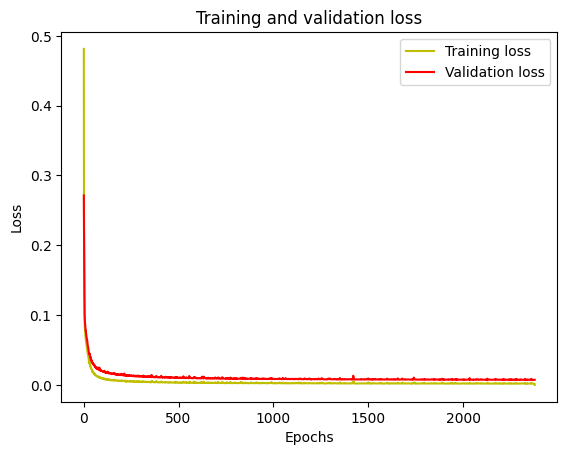

In [74]:

from keras.models import load_model
#from tf.keras import get_custom_objects

#get_custom_objects().update({'SSIMLoss': SSIMLoss})

import keras.losses

keras.losses.custom_loss = SSIMLoss

model.compile(optimizer='adam', loss='SSIMLoss')

model.save('GRID_k.h5')
model = tf.keras.models.load_model('GRID_k.h5',custom_objects ={'SSIMLoss':SSIMLoss})
#(X_train, X_train)
# Training the model
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50) # Early stopping (stops training when validation doesn't improve for {patience} epochs)
model_filepath = 'GRID_k.h5'
save_best = keras.callbacks.ModelCheckpoint(model_filepath, monitor='val_loss', save_best_only=True, mode='min') # Saves the best version of the model to disk (as measured on the validation data set)
# history= model.fit_generator(
#         train_generator,
#         epochs=300,
#         validation_data=validation_generator,
#         shuffle = True,
#         callbacks=[es, save_best])

history = model.fit(
       X_train,X_train,
       steps_per_epoch= 20 ,#// batch_size,
       epochs=2500,
       validation_data=(X_test,X_test),
      # validation_steps=75 // batch_size,
       shuffle = True)

#plot the training and validation accuracy and loss at each epoch
model.save('GRID_k.h5')
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
plt.plot(epochs, val_loss, 'r', label='Validation loss')

NameError: name 'epochs' is not defined

1/1 [==============================] - 0s 324ms/step


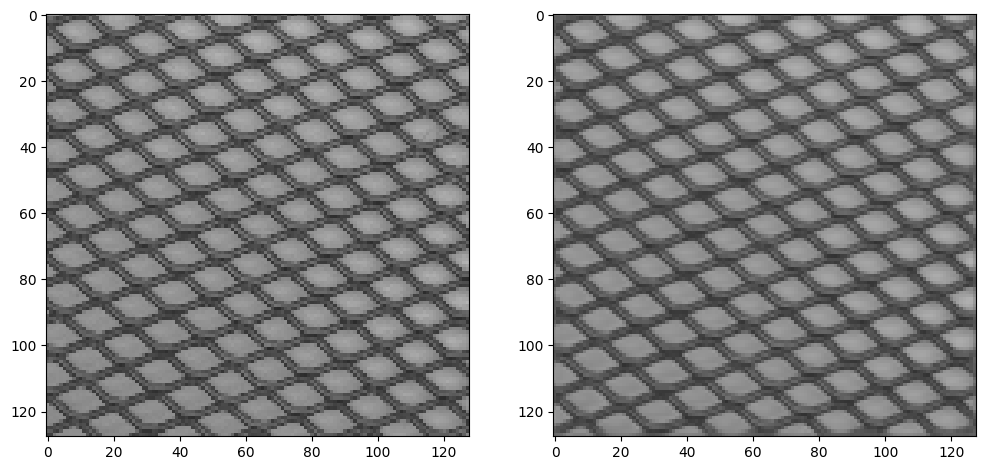

In [16]:
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= train_generator.batch_index:   #gets each generated batch of size batch_size
    data = train_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1

predicted = model.predict(data_batch[0])  #Predict on the first batch of images
image_number = random.randint(0, predicted.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(data_batch[0][image_number])
plt.subplot(122)
plt.imshow(predicted[image_number])
plt.show()

In [38]:
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= train_generator.batch_index:   #gets each generated batch of size batch_size
    data = train_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1

predicted = model.predict(data_batch[0])

decoded_imgs = model.predict(X_train)
n = 6
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    plt.title("Original")
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.title("Reconstructed")
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


NameError: name 'train_generator' is not defined

In [7]:
from keras.models import load_model
#from tf.keras import get_custom_objects

#get_custom_objects().update({'SSIMLoss': SSIMLoss})

import keras.losses

keras.losses.custom_loss = SSIMLoss

model.compile(optimizer='adam', loss='SSIMLoss')

model = tf.keras.models.load_model('GRID4.h5',custom_objects ={'SSIMLoss':SSIMLoss})



In [8]:
from keras.models import load_model
#from tf.keras import get_custom_objects

#get_custom_objects().update({'SSIMLoss': SSIMLoss})

import keras.losses

keras.losses.custom_loss = SSIMLoss

model.compile(optimizer='adam', loss='SSIMLoss')

#model.save('GRID_k.h5')
model = tf.keras.models.load_model('GRID_k.h5',custom_objects ={'SSIMLoss':SSIMLoss})

In [11]:
dataset_name='Grid'

2/2 [==============================] - 0s 146ms/step
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


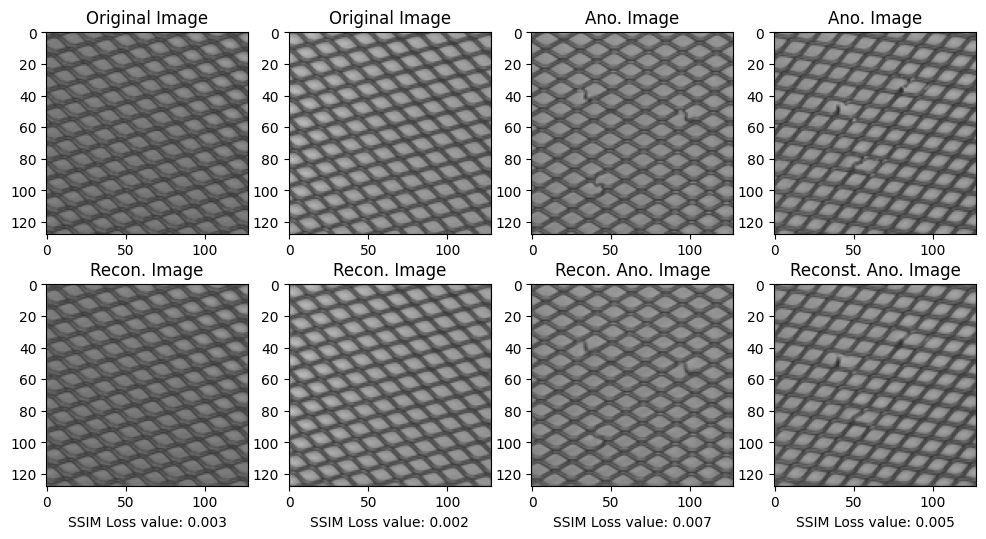

In [12]:
plt.figure(figsize=(12, 6))
decoded_imgs= model.predict(X_train)
decoded_mnistimgs= model.predict(X_test)
i=2
j=4
ax = plt.subplot(2, 4, 1 )
plt.imshow(X_train[i].reshape(SIZE,SIZE,3))
ax.set_title("Original Image")
ax = plt.subplot(2, 4, 2 )
plt.imshow(X_train[j].reshape(SIZE,SIZE,3))
ax.set_title("Original Image")
ax = plt.subplot(2, 4, 3 )
plt.imshow(X_test[i].reshape(SIZE,SIZE,3))
ax.set_title("Ano. Image") 

ax = plt.subplot(2, 4, 4 )
plt.imshow(X_test[j].reshape(SIZE,SIZE,3))
ax.set_title("Ano. Image")


ax = plt.subplot(2, 4, 5 )
plt.imshow(decoded_imgs[i].reshape(SIZE,SIZE,3))
ax.set_title("Recon. Image")
gg=tf.dtypes.cast(X_train[i], tf.float32)
value_a = SSIMLoss(decoded_imgs[i], gg)
label = 'SSIM Loss value: {:.3f}'
ax.set_xlabel(label.format(value_a) )

ax = plt.subplot(2, 4, 6 )
plt.imshow(decoded_imgs[j].reshape(SIZE,SIZE,3))
ax.set_title("Recon. Image")
gg=tf.dtypes.cast(X_train[j], tf.float32)
value_a = SSIMLoss(decoded_imgs[j], gg)
label = 'SSIM Loss value: {:.3f}'
ax.set_xlabel(label.format(value_a) )

ax = plt.subplot(2, 4, 7 )
plt.imshow(decoded_mnistimgs[i].reshape(SIZE,SIZE,3))
ax.set_title("Recon. Ano. Image")
gg12=tf.dtypes.cast(X_test[i], tf.float32)
value = SSIMLoss(decoded_mnistimgs[i], gg12)
label = 'SSIM Loss value: {:.3f}'
ax.set_xlabel(label.format(value) )

ax = plt.subplot(2, 4, 8 )
plt.imshow(decoded_mnistimgs[j].reshape(SIZE,SIZE,3))
ax.set_title("Reconst. Ano. Image")
gg12=tf.dtypes.cast(X_test[j], tf.float32)
value = SSIMLoss(decoded_mnistimgs[j], gg12)
label = 'SSIM Loss value: {:.3f}'
ax.set_xlabel(label.format(value) )

plt.savefig(f'{dataset_name}_compar.jpg')

2/2 [==============================] - 0s 144ms/step
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


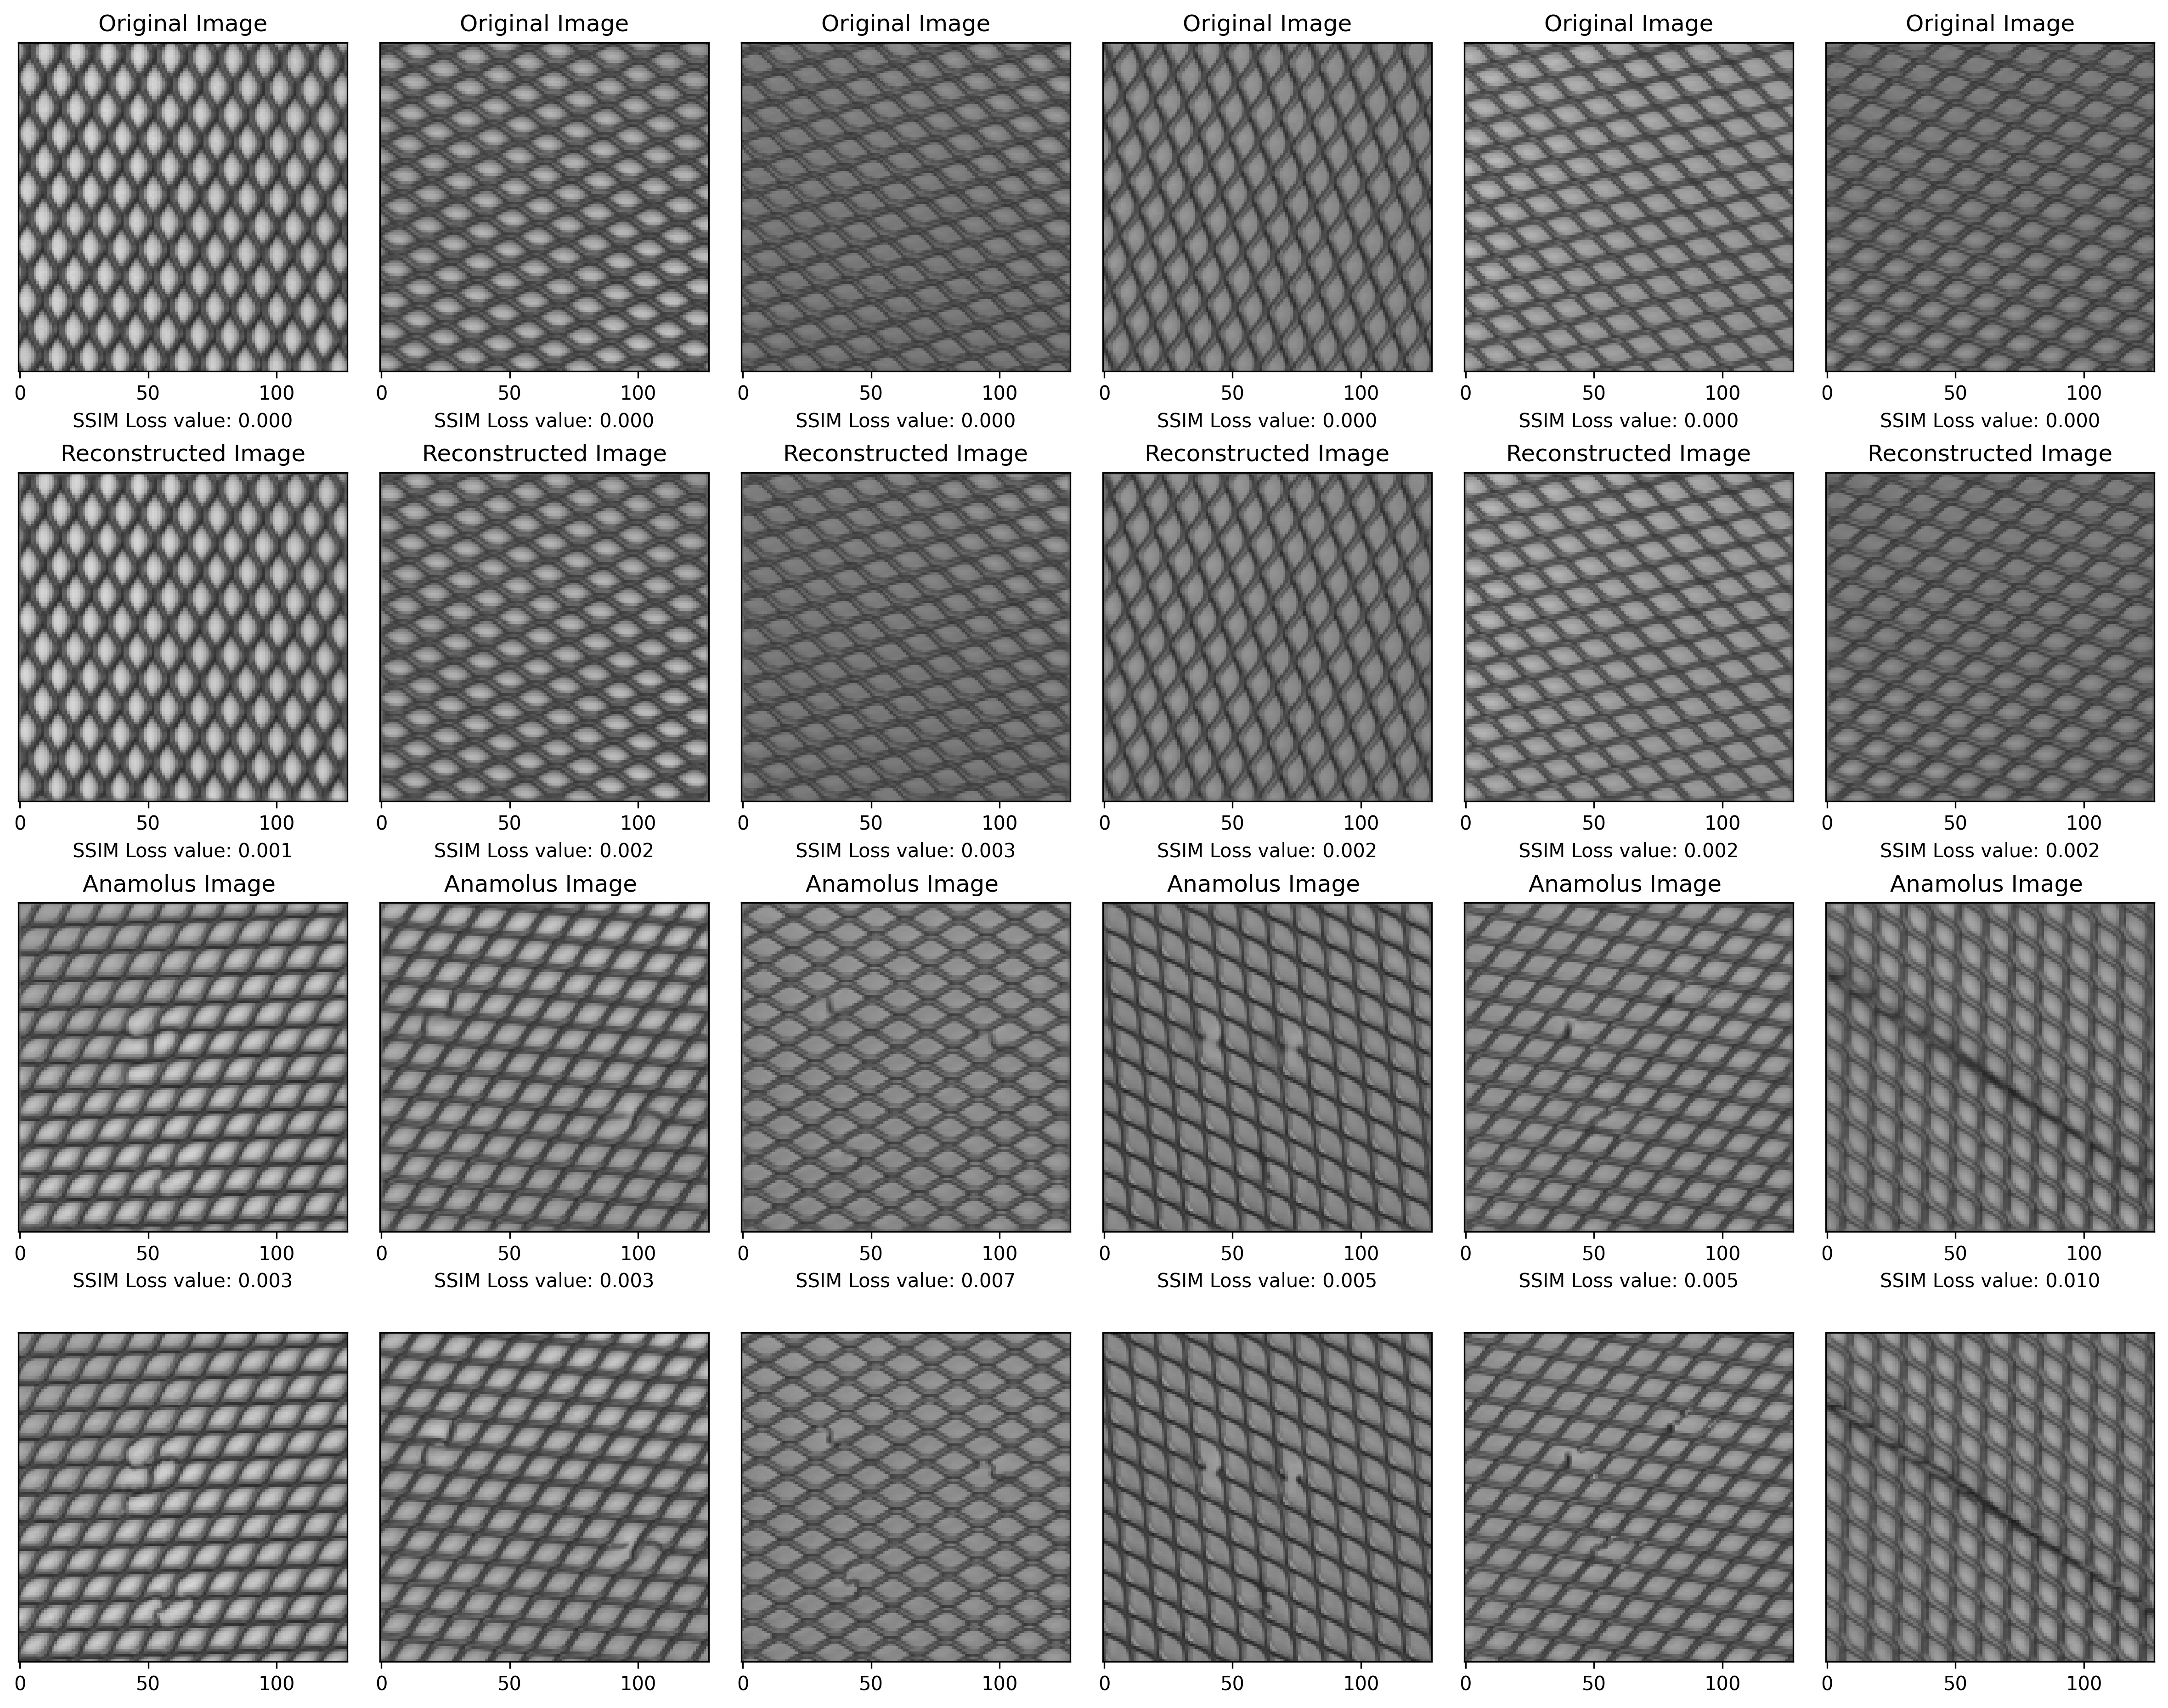

In [9]:
n = 6  # how many encoded and decoded images we will display
decoded_imgs= model.predict(X_train)
decoded_mnistimgs= model.predict(X_test)
plt.figure(figsize=(20, 20), dpi=300)
plt.subplots_adjust( wspace=0.1, hspace=0.07)
plt_a=1
SSIM_array=[]
for i in range(n):
    # Original training dataset vs Original training
    ax = plt.subplot(5, n, plt_a   )
    plt.imshow(X_train[i].reshape(SIZE,SIZE,3))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    value_a = SSIMLoss(X_train[i], X_train[i])

    ax.set_title("Original Image")
    label = 'SSIM Loss value: {:.3f}'
    ax.set_xlabel(label.format(value_a) )

    # Reconstructed good data  vs Original training data
    ax = plt.subplot(5, n, plt_a + n )
    plt.imshow(decoded_imgs[i].reshape(SIZE,SIZE,3))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    gg=tf.dtypes.cast(X_train[i], tf.float32)
    value_a = SSIMLoss(decoded_imgs[i], gg)
    SSIM_array.append(value_a)
    ax.set_title("Reconstructed Image")
    label = 'SSIM Loss value: {:.3f}'
    ax.set_xlabel(label.format(value_a) )



    # Reconstructed anomalous data  vs Original training data
    ax = plt.subplot(5, n, plt_a + 2*n)
    plt.imshow(decoded_mnistimgs[i].reshape(SIZE,SIZE,3))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    gg1=tf.dtypes.cast(X_test[i], tf.float32)
    value = SSIMLoss(decoded_mnistimgs[i], gg1)
    SSIM_array.append(value)
    label = 'SSIM Loss value: {:.3f}'
    ax.set_title("Anamolus Image " )
    ax.set_xlabel(label.format(value) )


    ax = plt.subplot(5, n, plt_a + 3*n )
    plt.imshow(X_test[i].reshape(SIZE,SIZE,3))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    #gg=tf.dtypes.cast(X_train[i], tf.float32)
    plt_a+=1
plt.show()

In [5]:
SSIM_arr=[]
gt_arr=[]
for i in range(len(decoded_imgs)):
  gg=tf.dtypes.cast(X_train[i], tf.float32)
  value_a = SSIMLoss(decoded_imgs[i], gg)
  SSIM_arr.append(value_a)
  gt_arr.append(0)


for i in range(len(decoded_mnistimgs)):
  gg1=tf.dtypes.cast(X_test[i], tf.float32)
  value_a = SSIMLoss(decoded_mnistimgs[i], gg1)
  SSIM_arr.append(value_a)
  gt_arr.append(1)
print(len(SSIM_arr))

NameError: name 'decoded_imgs' is not defined

In [4]:
print(np.array(SSIM_arr))
print(np.array(gt_arr))

NameError: name 'np' is not defined

In [78]:
np.save("gt_arr.npy",np.array(gt_arr))
np.save("SSIM_arr.npy",np.array(SSIM_arr))

In [79]:
#np_load_old = np.load

# modify the default parameters of np.load
#np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
y_true = np.load('SSIM_arr.npy') #FL preidcted regularity scores
print('Shape of SSIM_arr', y_true.shape)
y_pred = np.load('gt_arr.npy') #FL ground truth
print('gt_arr.npy', y_pred.shape)
#np.load = np_load_old

Shape of SSIM_arr (321,)
gt_arr.npy (321,)


In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve, auc
from numpy import sqrt
from numpy import argmax

fpr, tpr, thresholds = roc_curve(y_pred, y_true)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC-ROC curve = %0.3f' % roc_auc)
plt.plot([0,1], [0,1], linestyle='--', label='Binary Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

NameError: name 'y_pred' is not defined

In [2]:
fpr, tpr, threshold = roc_curve(y_pred, y_true, pos_label=1)
fnr = 1 - tpr
tnr= 1- fpr
dataset_name="Grid"
n=np.array([tpr, fpr])
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]

EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
print(EER)

#as a sanity check the value should be close to

EER = fnr[np.nanargmin(np.absolute((fnr - fpr)))]

print(EER)
print("Area under the ROC curve : %f" % roc_auc)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
print('AUC-ROC=%f'  % (roc_auc))
th=thresholds[ix]
plt.clf()
plt.plot(fpr, tpr, label='AUC-ROC curve = %0.3f' % roc_auc)

plt.plot([0,1], [0,1], linestyle='--', label='Binary Classifier')
plt.plot(fpr, tpr, linestyle='--', label='ssim_classifier')
#pyplot.plot(roc_auc='.', label='AUC-ROC')
#pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', s=90, label='Best')
#plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', s=90, label='Optimal Threhold')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', s=90, label='Optimal Threhold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig(f'{dataset_name}__OT.jpg',bbox_inches='tight')
plt.show()

NameError: name 'roc_curve' is not defined

In [83]:
print(y_pred)
y_pred_binary=[]

for i in y_true:
  if i >=th:
    y_pred_binary.append(1)
  else:
    y_pred_binary.append(0)

y_pred_binary_1=np.array(y_pred_binary )
print(np.array(y_pred_binary))


tn, fp, fn, tp =confusion_matrix(y_pred,y_pred_binary_1).ravel()
acc=(tn+tp)/(tn+ fp+ fn+ tp)*100
print(confusion_matrix(y_pred,y_pred_binary_1))
acc

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

96.26168224299066

In [84]:
f1_score(y_pred_binary,y_pred)

0.9016393442622951

In [85]:
from sklearn.metrics import average_precision_score

average_precision_score(y_pred, y_pred_binary)

0.8226947671118847

In [86]:
import csv
print(np.transpose(n))

rows = ["{},{}".format(i, j) for i, j in np.transpose(n)]
text = "\n".join(rows)
              #  adding header
headerList = ['i_tpr', 'i_fpr']


                # converting data frame to csv
with open(f'{dataset_name}_image.csv', 'w') as f:
    dw = csv.DictWriter(f, delimiter=',',fieldnames=headerList)
    dw.writeheader()
    f.write(text)
                
print("-------------------------in_display2---------------------------")
                
print(tpr,fpr)

[[0.         0.        ]
 [0.01754386 0.        ]
 [0.84210526 0.        ]
 [0.84210526 0.00757576]
 [0.85964912 0.00757576]
 [0.85964912 0.01136364]
 [0.87719298 0.01136364]
 [0.87719298 0.01515152]
 [0.92982456 0.01515152]
 [0.92982456 0.02651515]
 [0.94736842 0.02651515]
 [0.94736842 0.03787879]
 [0.96491228 0.03787879]
 [0.96491228 0.05681818]
 [0.98245614 0.05681818]
 [0.98245614 0.15151515]
 [1.         0.15151515]
 [1.         1.        ]]
-------------------------in_display2---------------------------
[0.         0.01754386 0.84210526 0.84210526 0.85964912 0.85964912
 0.87719298 0.87719298 0.92982456 0.92982456 0.94736842 0.94736842
 0.96491228 0.96491228 0.98245614 0.98245614 1.         1.        ] [0.         0.         0.         0.00757576 0.00757576 0.01136364
 0.01136364 0.01515152 0.01515152 0.02651515 0.02651515 0.03787879
 0.03787879 0.05681818 0.05681818 0.15151515 0.15151515 1.        ]


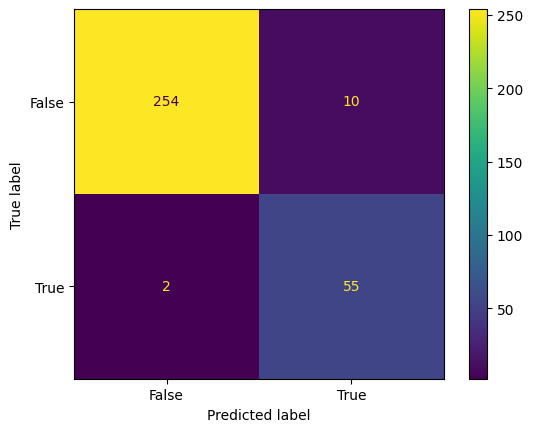

In [89]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

 

confusion_matrix = metrics.confusion_matrix(y_pred,y_pred_binary_1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

plt.savefig(f'{dataset_name}_conmat.jpg')
plt.show() 

Best Threshold=0.003066, F-Score=0.930


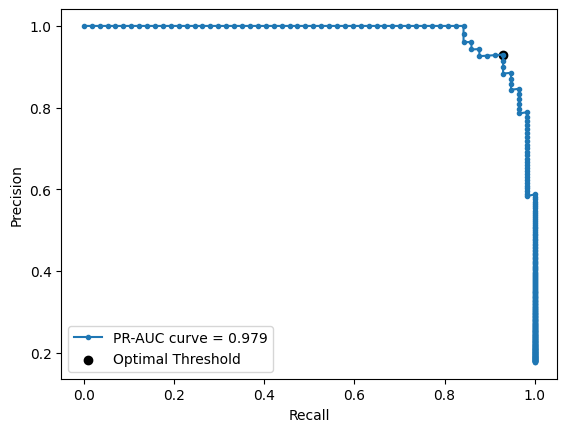

[[1.         0.17757009]
 [1.         0.178125  ]
 [1.         0.17868339]
 [1.         0.17924528]
 [1.         0.17981073]
 [1.         0.18037975]
 [1.         0.18095238]
 [1.         0.18152866]
 [1.         0.18210863]
 [1.         0.18269231]
 [1.         0.18327974]
 [1.         0.18387097]
 [1.         0.18446602]
 [1.         0.18506494]
 [1.         0.18566775]
 [1.         0.18627451]
 [1.         0.18688525]
 [1.         0.1875    ]
 [1.         0.18811881]
 [1.         0.18874172]
 [1.         0.18936877]
 [1.         0.19      ]
 [1.         0.19063545]
 [1.         0.19127517]
 [1.         0.19191919]
 [1.         0.19256757]
 [1.         0.19322034]
 [1.         0.19387755]
 [1.         0.19453925]
 [1.         0.19520548]
 [1.         0.19587629]
 [1.         0.19655172]
 [1.         0.19723183]
 [1.         0.19791667]
 [1.         0.19860627]
 [1.         0.1993007 ]
 [1.         0.2       ]
 [1.         0.20070423]
 [1.         0.20141343]
 [1.         0.20212766]


In [88]:
import keras.losses

keras.losses.custom_loss = SSIMLoss


model = tf.keras.models.load_model('GRID3.h5',custom_objects ={'SSIMLoss':SSIMLoss})
model.compile(optimizer='adam', loss='SSIMLoss')

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

precision, recall, thresholds = precision_recall_curve(y_pred, y_true)
auc_score = auc(recall, precision)
p=np.array([recall, precision])
#pyplot.plot(recall, precision, marker='.', label='Logistic')
# convert to f score

fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
#no_skill = len(testy[testy==1]) / len(testy)
#pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='Binary')
pyplot.plot(recall, precision, marker='.',label='PR-AUC curve = %0.3f' % auc_score)
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Optimal Threshold')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

import csv
print(np.transpose(p))
dataset_name="Grid"
rows = ["{},{}".format(i, j) for i, j in np.transpose(p)]
text = "\n".join(rows)
              #  adding header
headerList = ['recall', 'precision']


                # converting data frame to csv
with open(f'{dataset_name}_pr.csv', 'w') as f:
    dw = csv.DictWriter(f, delimiter=',',fieldnames=headerList)
    dw.writeheader()
    f.write(text)
                
print("-------------------------in_display2---------------------------")
                
print(precision, recall)

In [3]:
import glob
import os
import shutil

# Location with subdirectories
dir_src = "/home/ai/Pritha/mvt/grid/test"

# Destination location to copy all the files
dir_dst = "Grid_o/test2/2_defective/defective"

# Get List of all images
files = glob.glob(dir_src + '/**/*.png', recursive=True)

# Create the destination directory
if not os.path.exists(dir_dst):
    makedirs(dir_dst)
    
x="good"
# For each image
for file_name_src in files:
    if x not in file_name_src:
                
    # Let's say file_name_src is currently "/home/nponcian/Documents/folder_with_subfolders/Subfolder_1/Subfolder1_1/Subfolder_with_patientID1/2.dcm"
         file_dir = os.path.basename(os.path.dirname(file_name_src))  # Would be "Subfolder_with_patientID1"
         file_name = os.path.basename(file_name_src)  # Would be "2.dcm"

         file_name_dst = os.path.join(dir_dst, f"{file_dir}_{file_name}")  # Would be "/home/nponcian/Documents/folder_with_subfolders_dest/Subfolder_with_patientID1_2.dcm"

         shutil.copy2(file_name_src, file_name_dst)
         print(f"Copied:\n\tFr: {file_name_src}\n\tTo: {file_name_dst}")

Copied:
	Fr: /home/ai/Pritha/mvt/grid/test/glue/003.png
	To: Grid_o/test2/2_defective/defective/glue_003.png
Copied:
	Fr: /home/ai/Pritha/mvt/grid/test/glue/000.png
	To: Grid_o/test2/2_defective/defective/glue_000.png
Copied:
	Fr: /home/ai/Pritha/mvt/grid/test/glue/002.png
	To: Grid_o/test2/2_defective/defective/glue_002.png
Copied:
	Fr: /home/ai/Pritha/mvt/grid/test/glue/008.png
	To: Grid_o/test2/2_defective/defective/glue_008.png
Copied:
	Fr: /home/ai/Pritha/mvt/grid/test/glue/006.png
	To: Grid_o/test2/2_defective/defective/glue_006.png
Copied:
	Fr: /home/ai/Pritha/mvt/grid/test/glue/007.png
	To: Grid_o/test2/2_defective/defective/glue_007.png
Copied:
	Fr: /home/ai/Pritha/mvt/grid/test/glue/005.png
	To: Grid_o/test2/2_defective/defective/glue_005.png
Copied:
	Fr: /home/ai/Pritha/mvt/grid/test/glue/009.png
	To: Grid_o/test2/2_defective/defective/glue_009.png
Copied:
	Fr: /home/ai/Pritha/mvt/grid/test/glue/001.png
	To: Grid_o/test2/2_defective/defective/glue_001.png
Copied:
	Fr: /home/

In [10]:
!pip install scikit-image

  Using cached scikit_image-0.22.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached lazy_loader-0.3-py3-none-any.whl.metadata (4.3 kB)
Using cached scikit_image-0.22.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 1.5 MB/s eta 0:00:001.6 MB/s eta 0:00:01m
Using cached lazy_loader-0.3-py3-none-any.whl (9.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.6 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 4.3 MB/s eta 0:00:006.0 MB/s eta 0:00:01


In [9]:
from skimage.metrics import structural_similarity as ski_ssim

In [9]:
def image_reconstructed_plot(model,image_path):
    
    """ Plots image before and after passing through autoencoder, and SSIM contour """
    
    fig, ax = plt.subplots(1, 3)
    plt.gray()   
    SIZE=128
    cnt=0
    t_img=np.zeros(shape=(1,SIZE,SIZE,3))


    
    # img = Image.open(image_path).resize((128,128))
    # original=img
    # img=np.array(img,dtype=np.float32)/float(256)
    # t_img[k,:,:,:]=img
    # print(t_img.shape)  
    img=Image.open(image_path).resize((SIZE,SIZE))
    img=np.array(img,dtype=np.float32)/float(256)
    print(img.shape)  
    t_img[cnt,:,:,:]=img
    #merge[k,:,:,:]=img



    
    # if transform:
    #     img_transformed = transform(img)

    # model.to(device)
    # model.eval()
    # with torch.inference_mode():
    #     input_image = img_transformed.unsqueeze(dim=0).to(device)
    #     reconstructed = model(input_image)
    
    #original = img_transformed.permute(1, 2, 0).cpu()
    
    defect = image_path.split("/")
    
    ax[0].imshow(t_img.reshape(SIZE,SIZE,3)) 
    ax[0].set_title(f"{defect[5].capitalize()}")
    ax[0].axis("off")
    
    #reconstructed = reconstructed.squeeze(0).permute(1, 2, 0).cpu()
    reconstructed=model.predict(t_img[cnt])
    ax[1].imshow(reconstructed) 
    ax[1].set_title("Reconstructed")
    ax[1].axis("off")
    
   #  img_old = t_img[cnt]#np.array(original,dtype=np.float32)
   #  img_new = np.array(reconstructed,dtype=np.float32)
    
   #  pixel_range = max(np.max(img_new), np.max(img_old)) - min(np.min(img_new), np.min(img_old))
   # # _, S = ssim(img_old, img_new, full=True, channel_axis=False, data_range=1) # data range set to 1 or pixel_range, depending on desired precision

   #  _, S = SSIMLoss(img_old, img_new)
   #  ax[2].imshow(S, vmax = 1, cmap='jet') 
   #  ax[2].set_title("SSIM")
   #  ax[2].axis("off")

   #  plt.axis(False)



train_image_path = ("/home/ai/Pritha/autoencoder_with_3_layers/GRID1/test/0_good/good/019.png")
test_image_path_1 = ("/home/ai/Pritha/autoencoder_with_3_layers/GRID1/test/1_defective/defective/thread_007.png")
test_image_path_2 = ("/home/ai/Pritha/autoencoder_with_3_layers/GRID1/test/1_defective/defective/005.png")

#test_image_path_1=X_test[5]

# image_reconstructed_plot(model=model,
#                         image_path=train_image_path,
#                         )

#image_reconstructed_plot(model=model,
                        # image_path=test_image_path_1,
                        # )

# image_reconstructed_plot(model=model,
#                         image_path=test_image_path_2,
#                         )

(128, 128, 3)
(128, 128, 3)
2/2 [==============================] - 0s 137ms/step


NameError: name 'X_test_g' is not defined

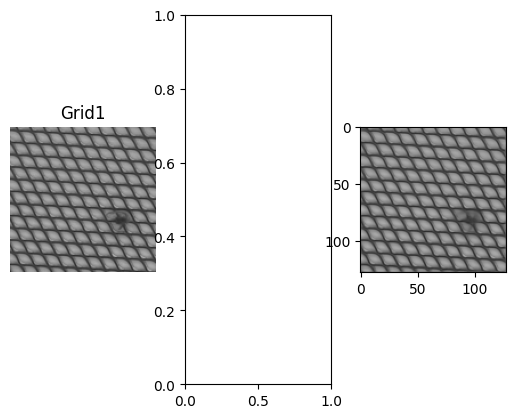

In [42]:
fig, ax = plt.subplots(1, 3)
plt.gray()   
SIZE=128
cnt=0
t_img=np.zeros(shape=(1,SIZE,SIZE,3))


    
    # img = Image.open(image_path).resize((128,128))
    # original=img
    # img=np.array(img,dtype=np.float32)/float(256)
    # t_img[k,:,:,:]=img
    # print(t_img.shape)  
img=Image.open(test_image_path_1).resize((SIZE,SIZE))
img=np.array(img,dtype=np.float32)/float(256)
print(img.shape)  
t_img[cnt,:,:,:]=img
print(t_img[cnt].shape)
    #merge[k,:,:,:]=img
reconstructed= model.predict(X_test)
ri=np.array(reconstructed[15],dtype=np.float32)

(row, col) = img.shape[0:2]
#img1= [[0] * row] * col
img1=np.zeros(shape=(row,col,1))
img1=np.squeeze(img1)

img2=np.zeros(shape=(row,col,1))
img2=np.squeeze(img1)
# Take the average of pixel values of the BGR Channels
# to convert the colored image to grayscale image
for i in range(row):
    for j in range(col):
        # Find the average of the BGR pixel values
        img1[i, j] = sum(img[i, j]) * 0.33
        img2[i, j] = sum(ri[i, j]) * 0.33

print(img2.shape)


    
    # if transform:
    #     img_transformed = transform(img)

    # model.to(device)
    # model.eval()
    # with torch.inference_mode():
    #     input_image = img_transformed.unsqueeze(dim=0).to(device)
    #     reconstructed = model(input_image)
    
    #original = img_transformed.permute(1, 2, 0).cpu()
    
defect = test_image_path_1.split("/")
    
ax[0].imshow(X_test[15].reshape(SIZE,SIZE,3)) 
ax[0].set_title(f"{defect[5].capitalize()}")
ax[0].axis("off")


    #reconstructed = reconstructed.squeeze(0).permute(1, 2, 0).cpu()
#reconstructed=model.predict(X_test[cnt])
#ax[1].imshow(reconstructed) 
# ax[1].set_title("Reconstructed")
# ax[1].axis("off")

plt.imshow(reconstructed[15].reshape(SIZE,SIZE,3))
            
# X_test_g = cv2.cvtColor(X_test[15], cv2.COLOR_BGR2GRAY)
rig=cv2.cvtColor(ri, cv2.COLOR_BGR2GRAY)
img_old = np.squeeze(X_test_g)    #np.array(original,dtype=np.float32)
img_new = np.squeeze(ri)
print(img_old.shape)    
print(img_new.shape)
pixel_range = max(np.max(img_new), np.max(img_old)) - min(np.min(img_new), np.min(img_old))
_, S = ski_ssim(img_old, img_new, full=True, channel_axis=False, data_range=1) # data range set to 1 or pixel_range, depending on desired precision

#_, S = SSIMLoss(img_old, img_new)
   #  ax[2].imshow(S, vmax = 1, cmap='jet') 
   #  ax[2].set_title("SSIM")
   #  ax[2].axis("off")

2/2 [==============================] - 0s 137ms/step
(128, 128, 1)


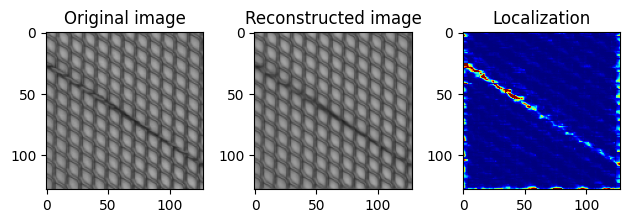

In [17]:
from skimage.metrics import structural_similarity as ski_ssim
fig, ax = plt.subplots(1, 3)
plt.gray()   
SIZE=128
cnt=0
t_img=np.zeros(shape=(1,SIZE,SIZE,3))


    
    # img = Image.open(image_path).resize((128,128))
    # original=img
    # img=np.array(img,dtype=np.float32)/float(256)
    # t_img[k,:,:,:]=img
    # print(t_img.shape)  
#img=Image.open(test_image_path_1).resize((SIZE,SIZE))

reconstructed= model.predict(X_test)

(row, col) = img.shape[0:2]
#img1= [[0] * row] * col
img1=np.zeros(shape=(row,col,1))
#img1=np.squeeze(img1)

img2=np.zeros(shape=(row,col,1))
#img2=np.squeeze(img1)
# Take the average of pixel values of the BGR Channels
# to convert the colored image to grayscale image
for i in range(row):
    for j in range(col):
        # Find the average of the BGR pixel values
        img1[i, j] = sum(X_test[5][i, j]) * 0.33
        img2[i, j] = sum(reconstructed[5][i, j]) * 0.33

print(img2.shape)
# img1 = cv2.imread(img, 0)
# img2 = cv2.imread(img_noise, 0)
# img1 = tensorify(img) # helper function to convert cv2 image to tensors
# img2 = tensorify(img)
#mse_none = mean_squared_error(img1, img1)
#ssim_none = ski_ssim(img1, img1, data_range=img.max() - img.min())

img_old=np.array(img1.squeeze(2))
img_new=np.array(img2.squeeze(2))

#mse_noise = mean_squared_error(img, img_noise)
# pixel_range = max(np.max(img1), np.max(img2)) - min(np.min(img1), np.min(img2))
# j,S = ski_ssim(img1, img2,
#                   full=True, channel_axis=False, data_range=pixel_range)
# print(pixel_range)
pixel_range = max(np.max(img_old), np.max(img_new)) - min(np.min(img_old), np.min(img_new))
j,S = ski_ssim(img_old, img_new, full=True, channel_axis=False, data_range=pixel_range)
# mse_const = mean_squared_error(img, img_const)
# ssim_const = ssim(img, img_const,
#                   data_range=img_const.max() - img_const.min())

ax[0].imshow(img1, cmap=plt.cm.gray, vmin=0, vmax=1)
#ax[0].set_xlabel(f'MSE: {mse_none:.2f}, SSIM: {ssim_none:.2f}')
ax[0].set_title('Original image')

ax[1].imshow(img2, cmap=plt.cm.gray, vmin=0, vmax=1)
#ax[1].set_xlabel(f'MSE: {mse_noise:.2f}, SSIM: {ssim_noise:.2f}')
ax[1].set_title('Reconstructed image')

# ax[2].imshow(img_const, cmap=plt.cm.gray, vmin=0, vmax=1)
# ax[2].set_xlabel(f'MSE: {mse_const:.2f}, SSIM: {ssim_const:.2f}')
# ax[2].set_title('Image plus constant')

ax[2].imshow(1-S, vmax = 0.5,cmap='jet')
ax[2].set_title("Localization")
plt.savefig(f'{dataset_name}_Residual_map.jpg')
plt.tight_layout()
plt.show()

In [23]:
for r in os.listdir(test_path):
    print(r)

bent_010.png
bent_005.png
bent_000.png
broken_011.png
broken_006.png
thread_007.png
glue_001.png
thread_005.png
broken_003.png
thread_000.png
bent_002.png
metal_contamination_002.png
metal_contamination_001.png
glue_010.png
glue_003.png
thread_001.png
bent_008.png
glue_004.png
thread_003.png
bent_011.png
glue_009.png
bent_007.png
glue_000.png
metal_contamination_000.png
broken_007.png
broken_010.png
metal_contamination_005.png
thread_004.png
thread_009.png
broken_005.png
glue_005.png
glue_006.png
broken_002.png
bent_009.png
metal_contamination_007.png
glue_002.png
glue_007.png
glue_008.png
bent_001.png
metal_contamination_009.png
broken_004.png
broken_000.png
thread_010.png
metal_contamination_006.png
metal_contamination_010.png
broken_009.png
metal_contamination_004.png
bent_004.png
thread_006.png
metal_contamination_008.png
thread_008.png
thread_002.png
metal_contamination_003.png
broken_008.png
broken_001.png
bent_006.png
bent_003.png


In [1]:
plt.figure(figsize=(12, 6))
i=2
j=4
ax = plt.subplot(2, 4, 1 )
plt.imshow(X_train[i].reshape(SIZE,SIZE,3))
ax.set_title("Original Image")
ax = plt.subplot(2, 4, 2 )
plt.imshow(X_train[j].reshape(SIZE,SIZE,3))
ax.set_title("Original Image")
ax = plt.subplot(2, 4, 3 )
plt.imshow(X_test[i].reshape(SIZE,SIZE,3))
ax.set_title("Ano. Image") 

ax = plt.subplot(2, 4, 4 )
plt.imshow(X_test[j].reshape(SIZE,SIZE,3))
ax.set_title("Ano. Image")


ax = plt.subplot(2, 4, 5 )
plt.imshow(decoded_imgs[i].reshape(SIZE,SIZE,3))
ax.set_title("Recon. Image")
gg=tf.dtypes.cast(X_train[i], tf.float32)
value_a = SSIMLoss(decoded_imgs[i], gg)
label = 'SSIM Loss value: {:.3f}'
ax.set_xlabel(label.format(value_a) )

ax = plt.subplot(2, 4, 6 )
plt.imshow(decoded_imgs[j].reshape(SIZE,SIZE,3))
ax.set_title("Recon. Image")
gg=tf.dtypes.cast(X_train[j], tf.float32)
value_a = SSIMLoss(decoded_imgs[j], gg)
label = 'SSIM Loss value: {:.3f}'
ax.set_xlabel(label.format(value_a) )

ax = plt.subplot(2, 4, 7 )
plt.imshow(decoded_mnistimgs[i].reshape(SIZE,SIZE,3))
ax.set_title("Recon. Ano. Image")
gg12=tf.dtypes.cast(X_test[i], tf.float32)
value = SSIMLoss(decoded_mnistimgs[i], gg12)
label = 'SSIM Loss value: {:.3f}'
ax.set_xlabel(label.format(value) )

ax = plt.subplot(2, 4, 8 )
plt.imshow(decoded_mnistimgs[j].reshape(SIZE,SIZE,3))
ax.set_title("Reconst. Ano. Image")
gg12=tf.dtypes.cast(X_test[j], tf.float32)
value = SSIMLoss(decoded_mnistimgs[j], gg12)
label = 'SSIM Loss value: {:.3f}'
ax.set_xlabel(label.format(value) )

plt.savefig(f'{dataset_name}_compar.jpg')

NameError: name 'plt' is not defined